# Exploratory Data Analysis (EDA)

This notebook explores and summarizes the datasets:
- **Machine_Settings_Log_01.csv**
- **Production_Log_01.csv**

---

## 1. Imports and Settings

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## 2. Load the Data

In [15]:
# Update path if running elsewhere
machine = pd.read_csv('Machine_Settings_Log_01.csv')
production = pd.read_csv('Production_Log_01.csv')

print(f'Machine Settings shape: {machine.shape}')
print(f'Production Log shape: {production.shape}')

Machine Settings shape: (10000, 3)
Production Log shape: (10000, 20)


In [16]:
merged_df = pd.merge(machine, production, on='configuration_log_ID', how='inner')
merged_df.shape

(10000, 22)

In [17]:
merged_df_t = pd.merge(machine, production, on='configuration_log_ID', how='outer')
merged_df_t.shape

(10000, 22)

In [18]:
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   configuration_log_ID  10000 non-null  int64  
 1   gear                  10000 non-null  int64  
 2   rotation_speed        10000 non-null  float64
 3   id                    10000 non-null  int64  
 4   width                 10000 non-null  float64
 5   height                10000 non-null  float64
 6   ionizationclass       10000 non-null  object 
 7   FluxCompensation      10000 non-null  object 
 8   pressure              10000 non-null  float64
 9   karma                 10000 non-null  float64
 10  modulation            10000 non-null  float64
 11  weight_in_kg          10000 non-null  float64
 12  weight_in_g           10000 non-null  float64
 13  error                 10000 non-null  object 
 14  error_type            3365 non-null   object 
 15  Quality             

,configuration_log_ID,gear,rotation_speed,id,width,height,ionizationclass,FluxCompensation,pressure,karma,...,weight_in_g,error,error_type,Quality,reflectionScore,distortion,nicesness,smartness,multideminsionality,roughness
0,1,2,122.121415,1,137.419169,44.326218,C,IV,103.937207,976.538993,...,8.370683e+08,no,NaN,95.489138,703.193051,49.666361,139.496837,2964.217002,no,123.202181
1,2,1,111.977476,2,98.706037,41.619531,A,II,101.177877,1031.806826,...,4.355043e+08,no,NaN,98.262642,663.936149,52.826310,100.380138,2733.298369,yes,111.040858
2,3,1,137.268544,3,117.262568,41.421088,A,III,99.381956,840.246668,...,5.995707e+08,no,NaN,98.472489,674.814037,51.967423,115.995772,2716.279965,no,138.439571
3,4,2,125.719071,4,122.657252,41.202308,A,I,101.833664,964.391122,...,6.498897e+08,no,NaN,97.107023,661.281569,47.626823,121.383895,2694.883523,no,125.939831
4,5,1,134.710713,5,118.085366,43.418485,C,I,95.246304,859.331870,...,6.054444e+08,no,NaN,92.994235,684.026152,47.420237,118.633440,2885.260257,no,135.123613


In [19]:
print(merged_df['error'].value_counts())

error
no     6635
yes    3365
Name: count, dtype: int64


In [20]:
# Show unique values to see what error types exist
print(merged_df['error_type'].unique())


[nan 'severe' 'minor' 'critical']


In [21]:
# Fill missing/empty error_type with a label (e.g., 'No Error')
merged_df['error_type'] = merged_df['error_type'].replace('', pd.NA)
merged_df['error_type'] = merged_df['error_type'].fillna('No Error')

<class 'pandas.core.frame.DataFrame'>
Index: 3365 entries, 8 to 9997
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   configuration_log_ID  3365 non-null   int64  
 1   gear                  3365 non-null   int64  
 2   rotation_speed        3365 non-null   float64
 3   id                    3365 non-null   int64  
 4   width                 3365 non-null   float64
 5   height                3365 non-null   float64
 6   ionizationclass       3365 non-null   object 
 7   FluxCompensation      3365 non-null   object 
 8   pressure              3365 non-null   float64
 9   karma                 3365 non-null   float64
 10  modulation            3365 non-null   float64
 11  weight_in_kg          3365 non-null   float64
 12  weight_in_g           3365 non-null   float64
 13  error                 3365 non-null   object 
 14  error_type            3365 non-null   object 
 15  Quality               3365

/var/folders/lj/36924lnj39380jwmbklmk4hh0000gn/T/ipykernel_1059/254610785.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=errors_df, x='error_type', palette='viridis')


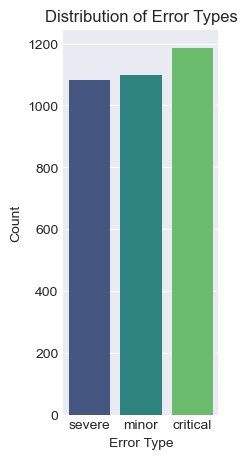

In [88]:
errors_df = merged_df[merged_df['error_type'].isin(['critical', 'severe', 'minor'])]
errors_df.shape
errors_df.info()
# Plotting the distribution of error types
plt.figure(figsize=(2, 5))
sns.countplot(data=errors_df, x='error_type', palette='viridis')
plt.title('Distribution of Error Types')
plt.xlabel('Error Type')
plt.ylabel('Count')
plt.show()

In [77]:
# List of categorical columns (object, category, or bool types)
cat_cols = errors_df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# List of numerical columns (int or float types)
num_cols = errors_df.select_dtypes(include=['number']).columns.tolist()

# If your target column (e.g., 'error_type') is in categorical, but you want to keep it separate:
# cat_cols.remove('error_type')  # if needed

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)


Categorical columns: ['ionizationclass', 'FluxCompensation', 'error', 'error_type', 'multideminsionality']
Numerical columns: ['configuration_log_ID', 'gear', 'rotation_speed', 'id', 'width', 'height', 'pressure', 'karma', 'modulation', 'weight_in_kg', 'weight_in_g', 'Quality', 'reflectionScore', 'distortion', 'nicesness', 'smartness', 'roughness']


In [78]:
# For Error Data Set 
cate_cols = merged_df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# List of numerical columns (int or float types)
nume_cols = merged_df.select_dtypes(include=['number']).columns.tolist()

# If your target column (e.g., 'error_type') is in categorical, but you want to keep it separate:
# cat_cols.remove('error_type')  # if needed

print("Categorical columns:", cate_cols)
print("Numerical columns:", nume_cols)


Categorical columns: ['ionizationclass', 'FluxCompensation', 'error', 'error_type', 'multideminsionality']
Numerical columns: ['configuration_log_ID', 'gear', 'rotation_speed', 'id', 'width', 'height', 'pressure', 'karma', 'modulation', 'weight_in_kg', 'weight_in_g', 'Quality', 'reflectionScore', 'distortion', 'nicesness', 'smartness', 'roughness']


#### EDA For Merged dataset ####

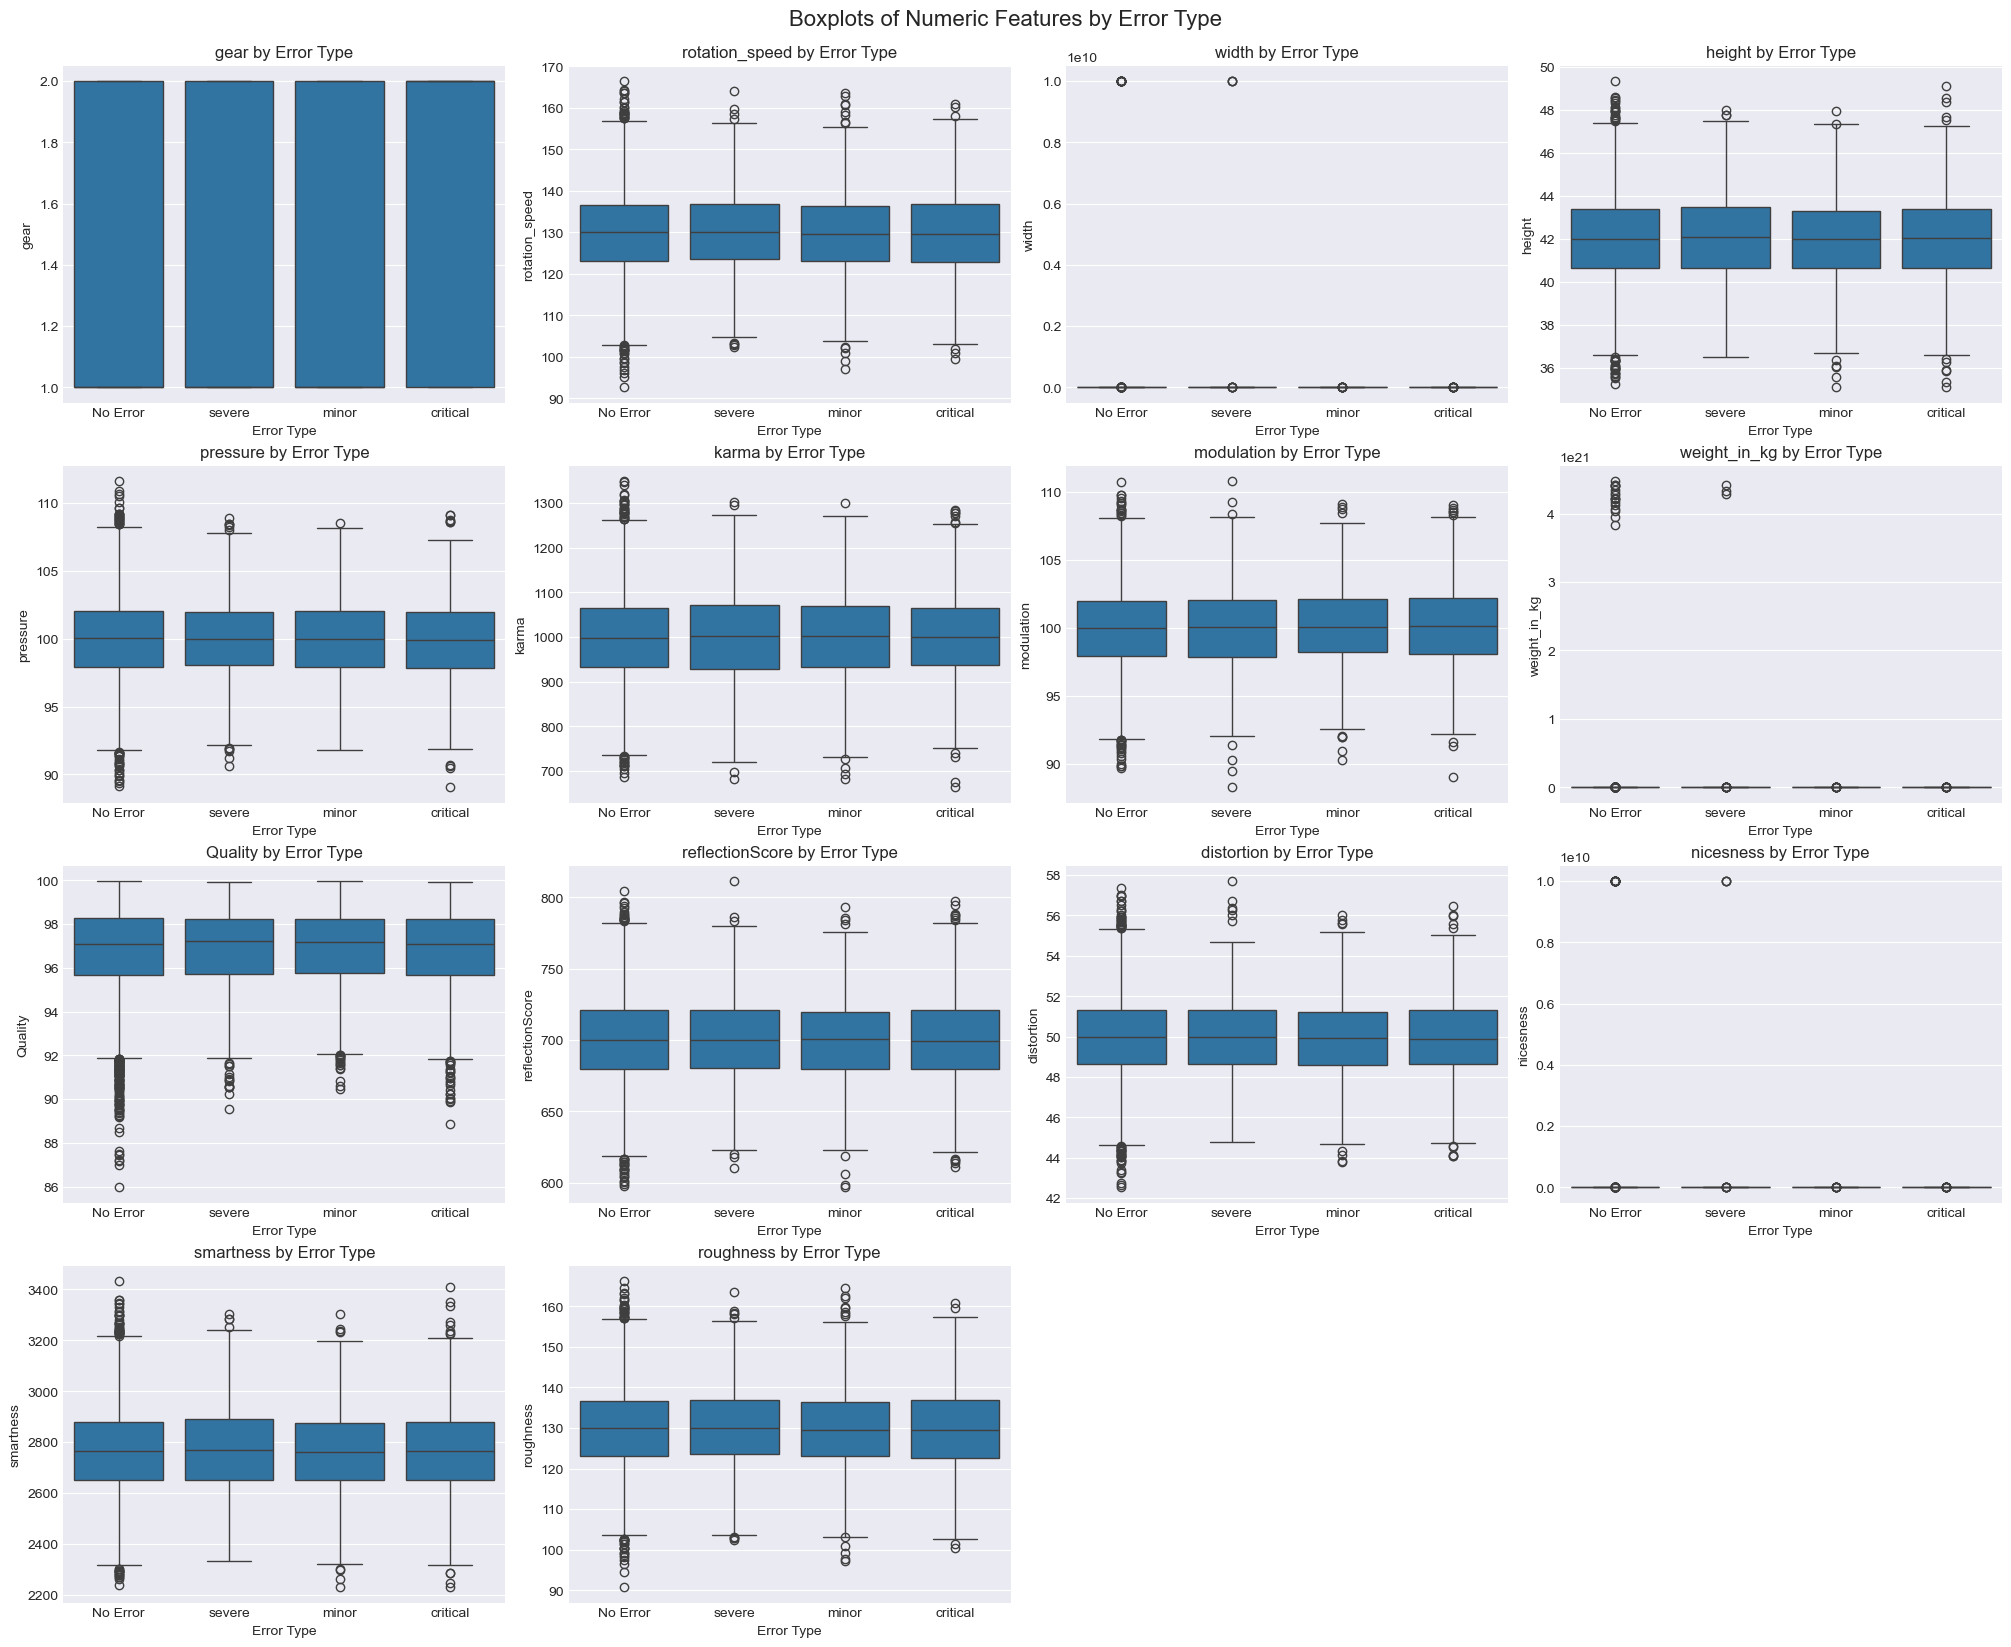

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['gear', 'rotation_speed', 'width', 'height', 'pressure', 'karma', 
                'modulation', 'weight_in_kg', 'Quality', 'reflectionScore', 'distortion', 'nicesness', 'smartness', 'roughness']

# Convert columns to numeric (ignore errors)
for col in numeric_cols:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

n_cols = 4  # Number of boxplots per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4), constrained_layout=True)

for idx, col in enumerate(numeric_cols):
    r, c = divmod(idx, n_cols)
    ax = axes[r, c] if n_rows > 1 else axes[c]
    sns.boxplot(x='error_type', y=col, data=merged_df, ax=ax)
    ax.set_title(f'{col} by Error Type')
    ax.set_xlabel('Error Type')
    ax.set_ylabel(col)

# Hide any unused subplots
for idx in range(len(numeric_cols), n_rows * n_cols):
    r, c = divmod(idx, n_cols)
    fig.delaxes(axes[r, c] if n_rows > 1 else axes[c])

plt.suptitle('Boxplots of Numeric Features by Error Type', y=1.02, fontsize=16)
plt.show()


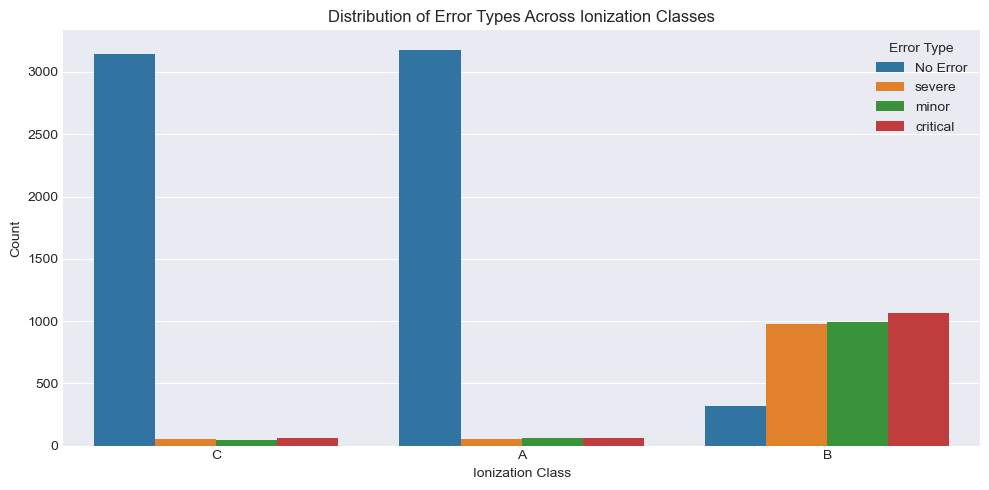

In [25]:

plt.figure(figsize=(10, 5))
sns.countplot(x='ionizationclass', hue='error_type', data=merged_df)
plt.title('Distribution of Error Types Across Ionization Classes')
plt.xlabel('Ionization Class')
plt.ylabel('Count')
plt.legend(title='Error Type')
plt.tight_layout()
plt.show()


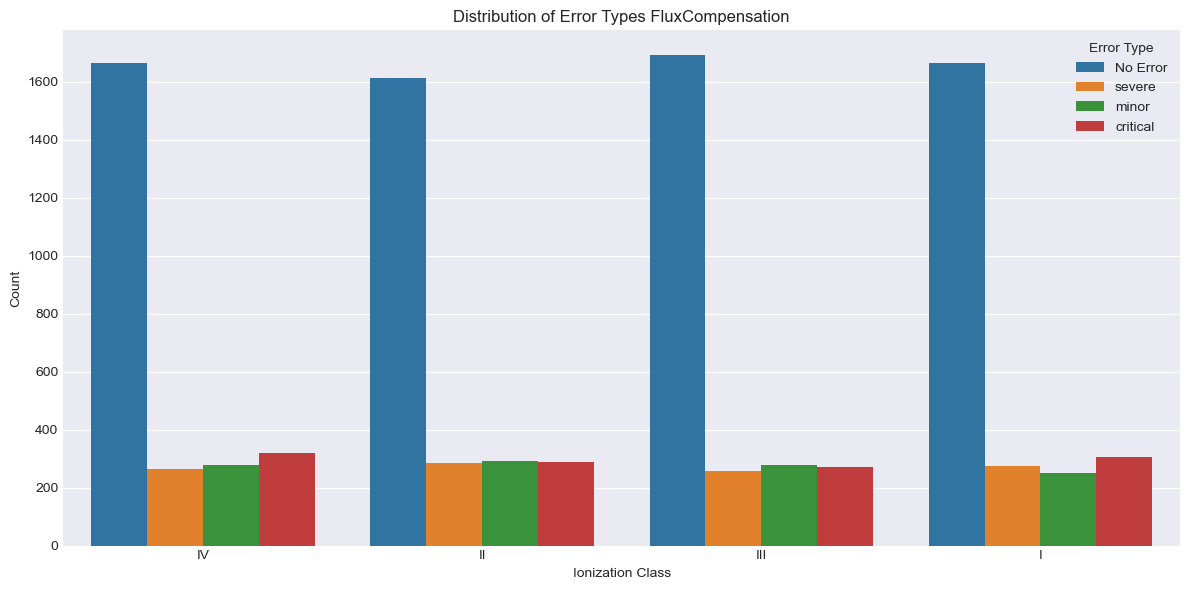

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(x='FluxCompensation', hue='error_type', data=merged_df)
plt.title('Distribution of Error Types FluxCompensation')
plt.xlabel('Ionization Class')
plt.ylabel('Count')
plt.legend(title='Error Type')
plt.tight_layout()
plt.show()

#### EDA for Error Dataset

/var/folders/lj/36924lnj39380jwmbklmk4hh0000gn/T/ipykernel_1059/1430437641.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors_df[col] = pd.to_numeric(errors_df[col], errors='coerce')


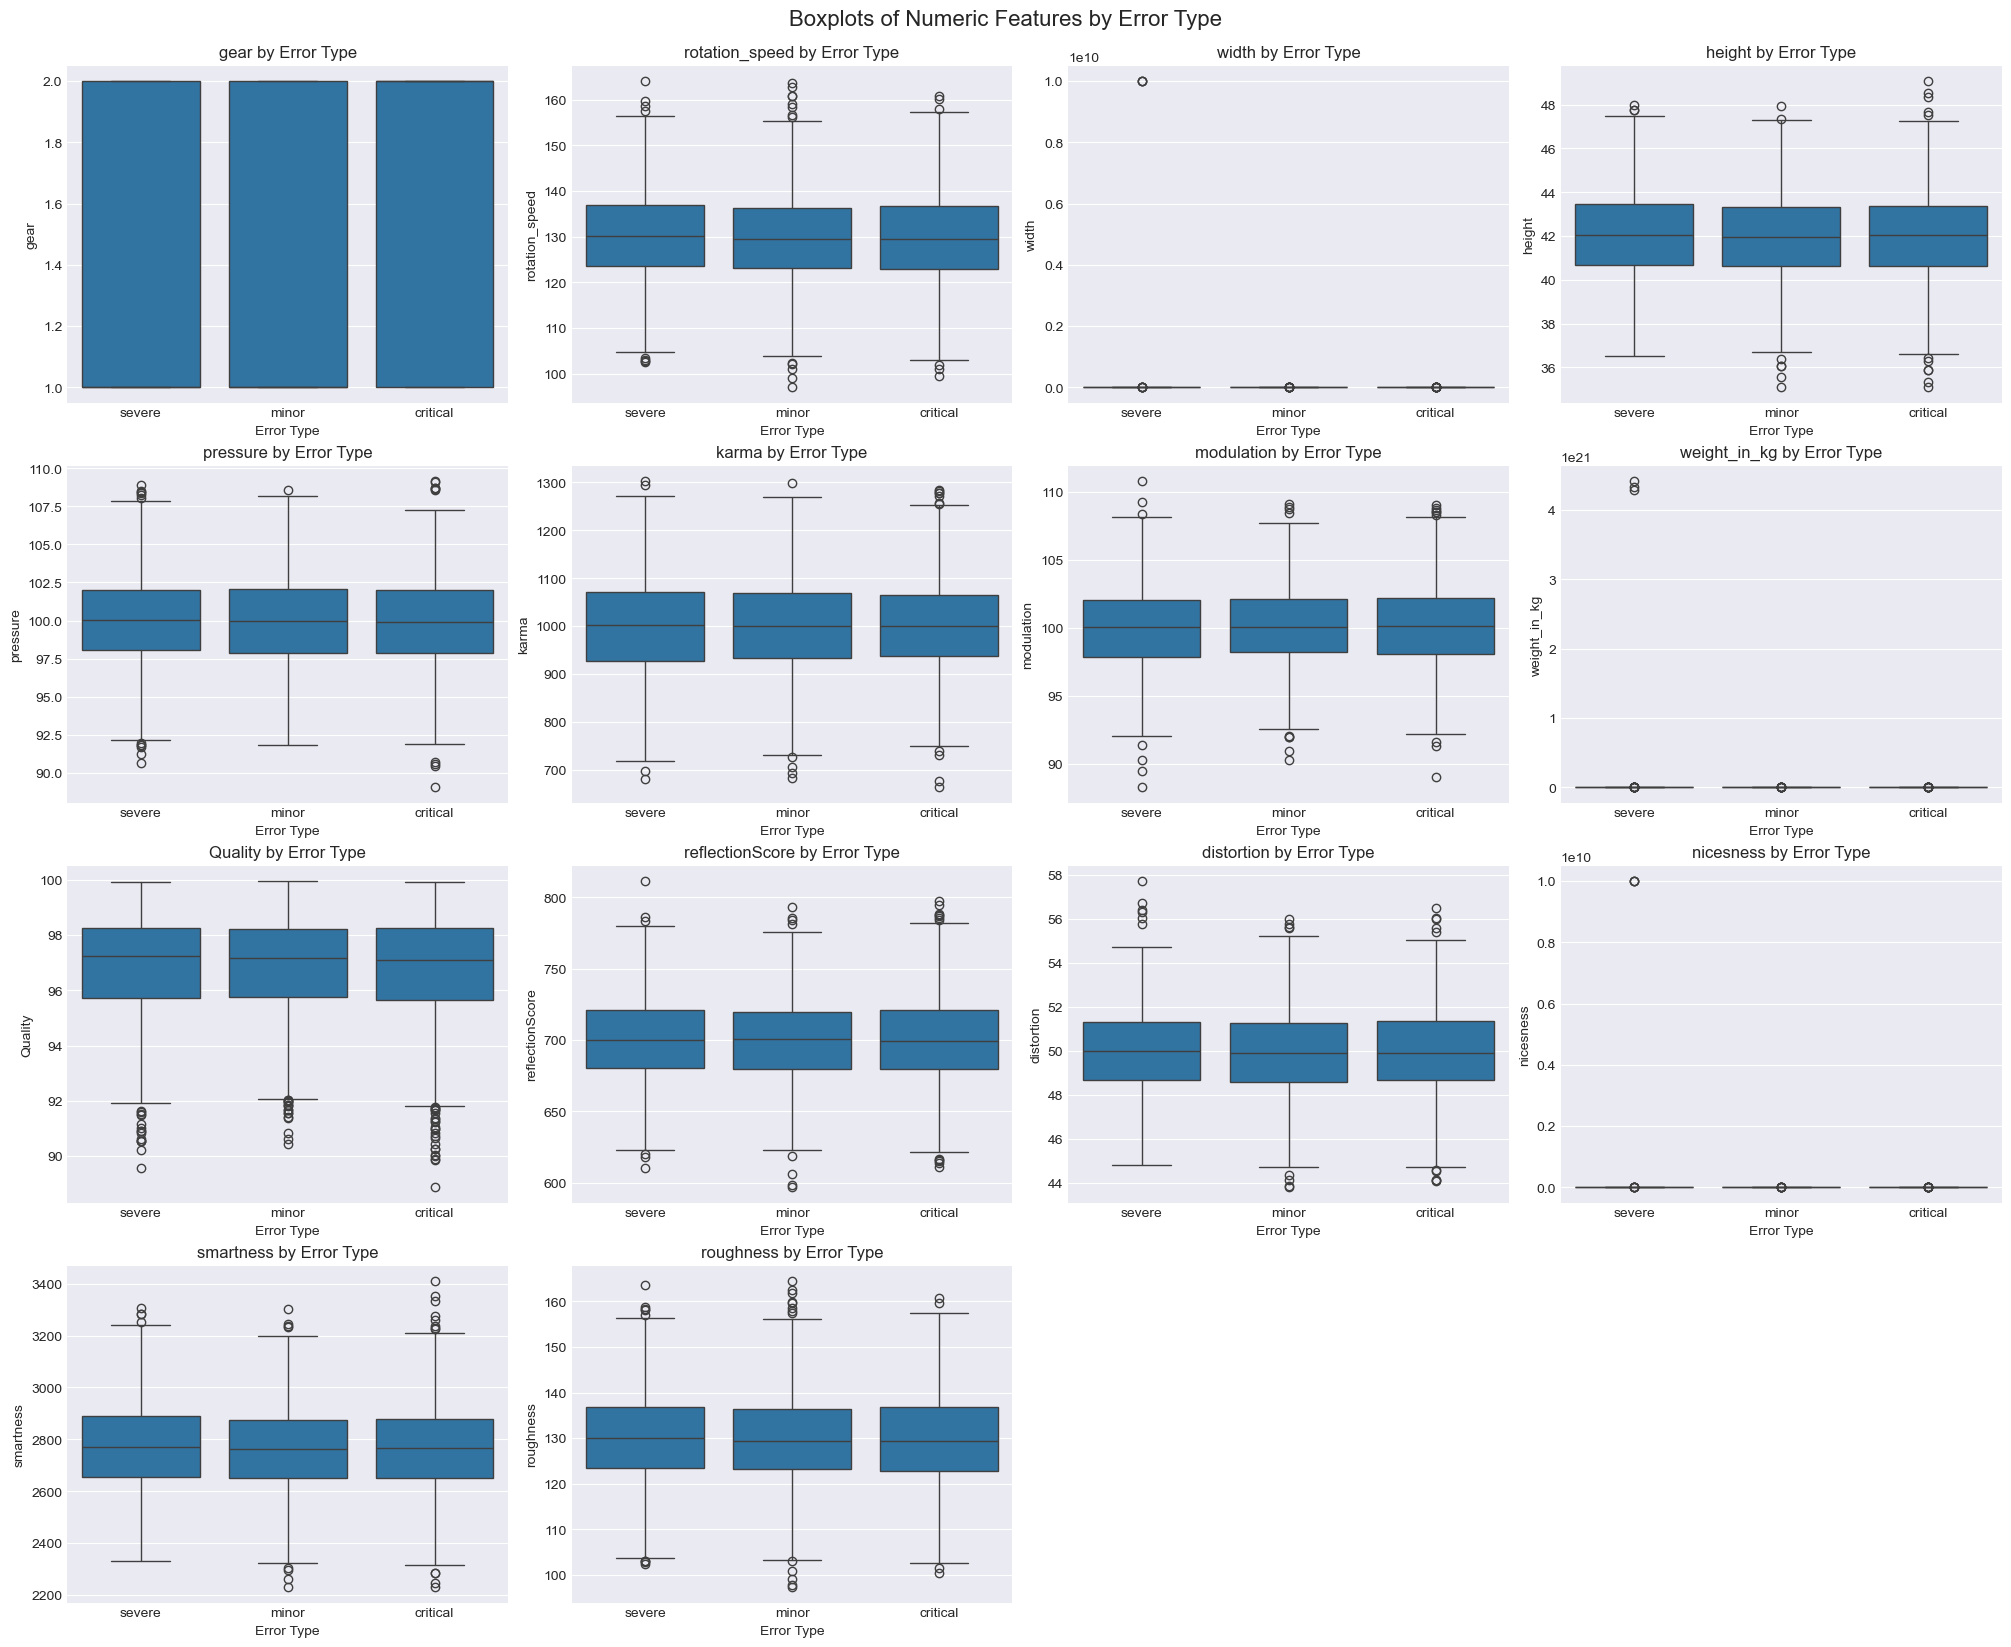

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['gear', 'rotation_speed', 'width', 'height', 'pressure', 'karma', 
                'modulation', 'weight_in_kg', 'Quality', 'reflectionScore', 'distortion', 'nicesness', 'smartness', 'roughness']

# Convert columns to numeric (ignore errors)
for col in numeric_cols:
    errors_df[col] = pd.to_numeric(errors_df[col], errors='coerce')

n_cols = 4  # Number of boxplots per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4), constrained_layout=True)

for idx, col in enumerate(numeric_cols):
    r, c = divmod(idx, n_cols)
    ax = axes[r, c] if n_rows > 1 else axes[c]
    sns.boxplot(x='error_type', y=col, data=errors_df, ax=ax)
    ax.set_title(f'{col} by Error Type')
    ax.set_xlabel('Error Type')
    ax.set_ylabel(col)

# Hide any unused subplots
for idx in range(len(numeric_cols), n_rows * n_cols):
    r, c = divmod(idx, n_cols)
    fig.delaxes(axes[r, c] if n_rows > 1 else axes[c])

plt.suptitle('Boxplots of Numeric Features by Error Type', y=1.02, fontsize=16)
plt.show()


#### ML - Classification model - Random Forest Classifier 

In [39]:
from sklearn.preprocessing import LabelEncoder

# Copy your DataFrame to avoid changing the original, optional but safe
df_model = merged_df.copy()

# Handle missing values for categorical columns
df_model['ionizationclass'] = df_model['ionizationclass'].replace('', pd.NA).fillna('Unknown')
df_model['FluxCompensation'] = df_model['FluxCompensation'].replace('', pd.NA).fillna('Unknown')

# Label Encode both columns
for col in ['ionizationclass', 'FluxCompensation']:
    le_col = LabelEncoder()
    df_model[col] = le_col.fit_transform(df_model[col].astype(str))


In [28]:
features = ['width', 'height', 'pressure', 'karma', 'modulation', 'roughness',
            'Quality', 'gear', 'rotation_speed', 'ionizationclass', 'FluxCompensation']
target = 'error_type'


In [29]:
for col in ['width', 'height', 'pressure', 'karma', 'modulation', 'roughness', 'Quality', 'gear', 'rotation_speed']:
    df_model[col] = pd.to_numeric(df_model[col], errors='coerce')


In [30]:
df_model[target] = df_model[target].replace('', pd.NA).fillna('No Error')
df_model = df_model[features + [target]].dropna()


In [31]:
le_target = LabelEncoder()
df_model[target] = le_target.fit_transform(df_model[target])

X = df_model[features]
y = df_model[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_target.classes_))


Accuracy: 0.74

Classification Report:
               precision    recall  f1-score   support

    No Error       0.94      0.95      0.95      1327
    critical       0.34      0.35      0.34       237
       minor       0.30      0.30      0.30       220
      severe       0.35      0.32      0.34       216

    accuracy                           0.74      2000
   macro avg       0.48      0.48      0.48      2000
weighted avg       0.74      0.74      0.74      2000



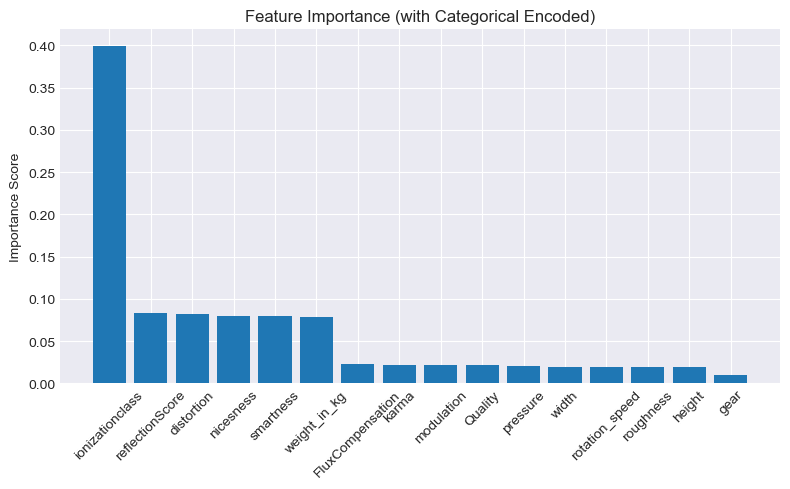

In [60]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = np.array(features)

plt.figure(figsize=(8, 5))
plt.title("Feature Importance (with Categorical Encoded)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=45)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


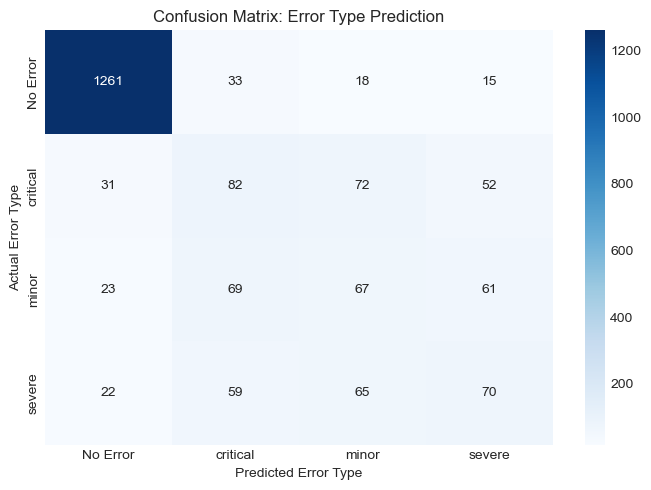

In [34]:
from sklearn.metrics import confusion_matrix
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot with seaborn
plt.figure(figsize=(7, 5))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=le_target.classes_, 
    yticklabels=le_target.classes_
)
plt.xlabel('Predicted Error Type')
plt.ylabel('Actual Error Type')
plt.title('Confusion Matrix: Error Type Prediction')
plt.tight_layout()
plt.show()


#### Data Augmentation ####

In [51]:
import pandas as pd

def custom_augment_numeric(merged_df, numeric_cols, cat_cols, factors=[0.25, 0.5, 0.75, 1.25]):
    """
    Augments numerical columns of a DataFrame by multiplying with factors.
    - df: original DataFrame
    - num_cols: list of numeric column names to augment
    - cat_cols: list of categorical column names to keep unchanged
    - factors: list of factors to multiply numeric columns by
    Returns a new DataFrame with original + augmented rows.
    """
    augmented_rows = []
    # For each factor, create a modified copy of the numeric columns
    for factor in factors:
        df_aug = merged_df.copy()
        df_aug[num_cols] = df_aug[num_cols] * factor
        augmented_rows.append(df_aug)
    # Concatenate original and augmented data
    df_all = pd.concat([merged_df] + augmented_rows, ignore_index=True)
    return df_all

# Example usage:
# Suppose you have a DataFrame df_train, with numerical columns in num_cols and categoricals in cat_cols
# num_cols = ['width', 'height', 'pressure', 'karma', ...]
# cat_cols = ['ionizationclass', 'FluxCompensation', 'error_type']
# df_augmented = custom_augment_numeric(df_train, num_cols, cat_cols)


Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

    No Error       0.96      1.00      0.98      6635
    critical       0.97      0.94      0.95      1186
       minor       0.98      0.91      0.95      1097
      severe       0.98      0.91      0.94      1082

    accuracy                           0.97     10000
   macro avg       0.98      0.94      0.96     10000
weighted avg       0.97      0.97      0.97     10000



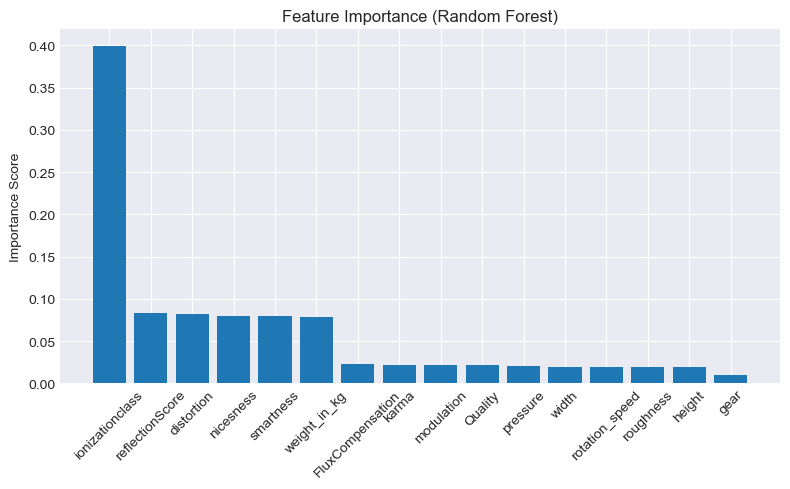

In [55]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# --- Your custom augmentation function goes here ---

# Step 1: Define your numeric and categorical columns
#num_cols = ['width', 'height', 'pressure', 'karma', 'modulation', 'roughness', 'Quality', 'gear', 'rotation_speed']
#cat_cols = ['ionizationclass', 'FluxCompensation', 'error_type']

# Step 2: Augment the dataset
df_augmented = custom_augment_numeric(merged_df, numeric_cols, cat_cols)

# Step 3: Label Encode categorical columns if needed (for features that are categorical)
for col in ['ionizationclass', 'FluxCompensation']:
    le = LabelEncoder()
    df_augmented[col] = le.fit_transform(df_augmented[col].astype(str))

# Step 4: Encode the target variable ('error_type')
le_target = LabelEncoder()
df_augmented['error_type'] = le_target.fit_transform(df_augmented['error_type'])

# Step 5: Prepare features and target
features = numeric_cols + ['ionizationclass', 'FluxCompensation']
target = 'error_type'

X = df_augmented[features]
y = df_augmented[target]

# Step 6: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 7: Train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 8: Predict and evaluate
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_target.classes_))

# Step 9: Plot feature importance
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = np.array(features)

plt.figure(figsize=(8, 5))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=45)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


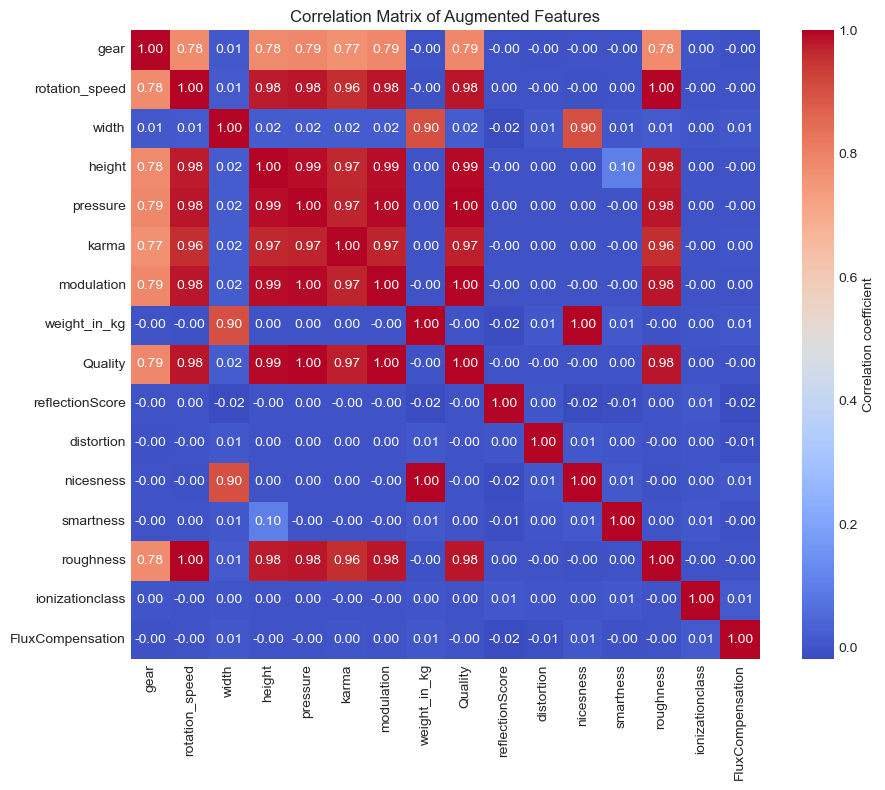

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for all features (including encoded categoricals)
corr_matrix = df_augmented[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Matrix of Augmented Features')
plt.tight_layout()
plt.show()


#### Data Augmentation 2

In [61]:
import pandas as pd

def custom_augment_numeric(merged_df, numeric_cols, cat_cols, factors=[0.6, 0.8, 1.2, 1.4]):
    """
    Augments numerical columns of a DataFrame by multiplying with factors.
    - df: original DataFrame
    - num_cols: list of numeric column names to augment
    - cat_cols: list of categorical column names to keep unchanged
    - factors: list of factors to multiply numeric columns by
    Returns a new DataFrame with original + augmented rows.
    """
    augmented_rows = []
    # For each factor, create a modified copy of the numeric columns
    for factor in factors:
        df_aug = merged_df.copy()
        df_aug[num_cols] = df_aug[num_cols] * factor
        augmented_rows.append(df_aug)
    # Concatenate original and augmented data
    df_all = pd.concat([merged_df] + augmented_rows, ignore_index=True)
    return df_all

# Example usage:
# Suppose you have a DataFrame df_train, with numerical columns in num_cols and categoricals in cat_cols
# num_cols = ['width', 'height', 'pressure', 'karma', ...]
# cat_cols = ['ionizationclass', 'FluxCompensation', 'error_type']
# df_augmented = custom_augment_numeric(df_train, num_cols, cat_cols)


Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

    No Error       0.97      0.99      0.98      6635
    critical       0.96      0.93      0.95      1186
       minor       0.98      0.91      0.94      1097
      severe       0.99      0.90      0.94      1082

    accuracy                           0.97     10000
   macro avg       0.97      0.94      0.95     10000
weighted avg       0.97      0.97      0.97     10000



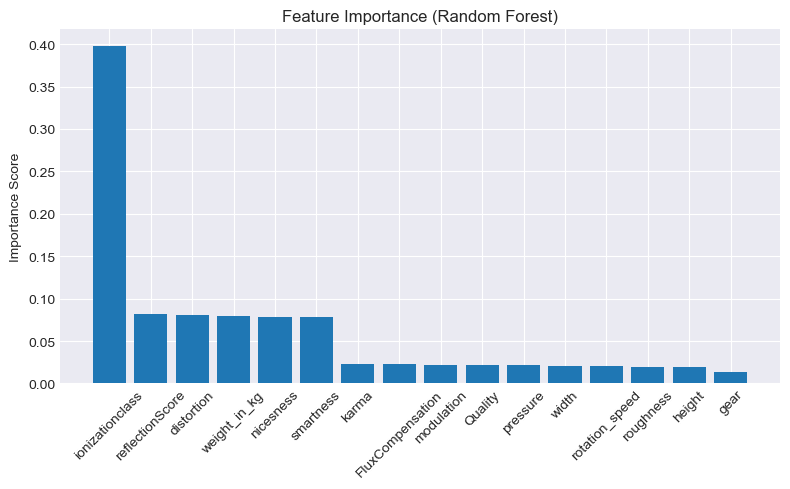

In [62]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# --- Your custom augmentation function goes here ---

# Step 1: Define your numeric and categorical columns
#num_cols = ['width', 'height', 'pressure', 'karma', 'modulation', 'roughness', 'Quality', 'gear', 'rotation_speed']
#cat_cols = ['ionizationclass', 'FluxCompensation', 'error_type']

# Step 2: Augment the dataset
df_augmented = custom_augment_numeric(merged_df, numeric_cols, cat_cols)

# Step 3: Label Encode categorical columns if needed (for features that are categorical)
for col in ['ionizationclass', 'FluxCompensation']:
    le = LabelEncoder()
    df_augmented[col] = le.fit_transform(df_augmented[col].astype(str))

# Step 4: Encode the target variable ('error_type')
le_target = LabelEncoder()
df_augmented['error_type'] = le_target.fit_transform(df_augmented['error_type'])

# Step 5: Prepare features and target
features = numeric_cols + ['ionizationclass', 'FluxCompensation']
target = 'error_type'

X = df_augmented[features]
y = df_augmented[target]

# Step 6: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 7: Train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 8: Predict and evaluate
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_target.classes_))

# Step 9: Plot feature importance
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = np.array(features)

plt.figure(figsize=(8, 5))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=45)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


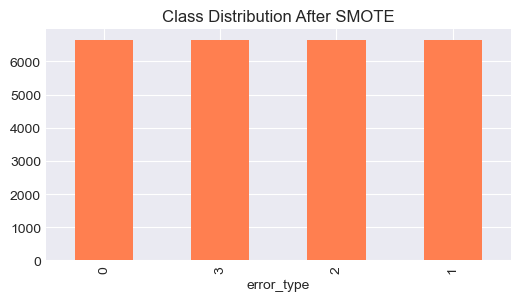

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   6.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   6.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   6.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  11.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   5.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  12.0s
[CV] END ma

In [24]:
# 1. SMOTE for class balancing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Assume df_model, features, target, and le_target (LabelEncoder) are already defined

X = df_model[features]
y = df_model[target]

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Optional: See new class distribution
pd.Series(y_res).value_counts().plot(kind='bar', color='coral', figsize=(6,3))
plt.title('Class Distribution After SMOTE')
plt.show()

# 2. GridSearchCV for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='f1_macro'
)

grid_search.fit(X_res, y_res)

print("Best parameters:", grid_search.best_params_)

# 3. Retrain and evaluate on balanced, tuned data
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_target.classes_))


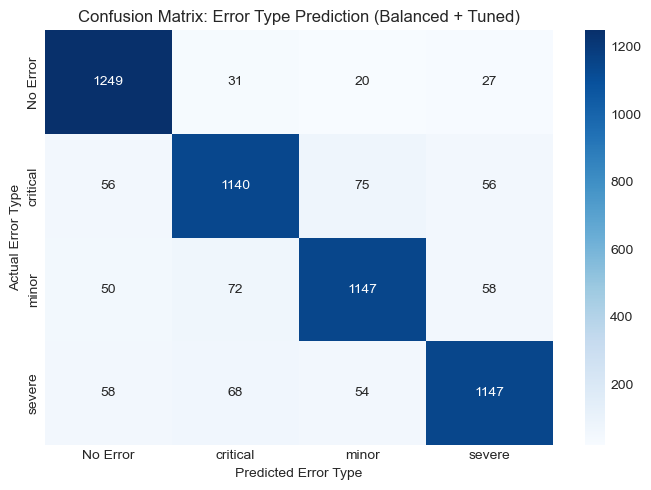

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=le_target.classes_,
    yticklabels=le_target.classes_
)
plt.xlabel('Predicted Error Type')
plt.ylabel('Actual Error Type')
plt.title('Confusion Matrix: Error Type Prediction (Balanced + Tuned)')
plt.tight_layout()
plt.show()


#### XGBoost Classifier

In [65]:
!pip install xgboost


In [69]:
from sklearn.preprocessing import LabelEncoder

# Encode target
le_target = LabelEncoder()
df_model['error_type'] = le_target.fit_transform(df_model['error_type'])

# Now prepare X and y
X = df_model[features]
y = df_model['error_type']

# Proceed with train-test split and XGBoost as before:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

xgb_clf = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_target.classes_))


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:24:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1745056743506/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.72

Classification Report:
               precision    recall  f1-score   support

    No Error       0.94      0.95      0.95      1327
    critical       0.27      0.27      0.27       237
       minor       0.27      0.25      0.26       220
      severe       0.28      0.27      0.28       216

    accuracy                           0.72      2000
   macro avg       0.44      0.44      0.44      2000
weighted avg       0.72      0.72      0.72      2000



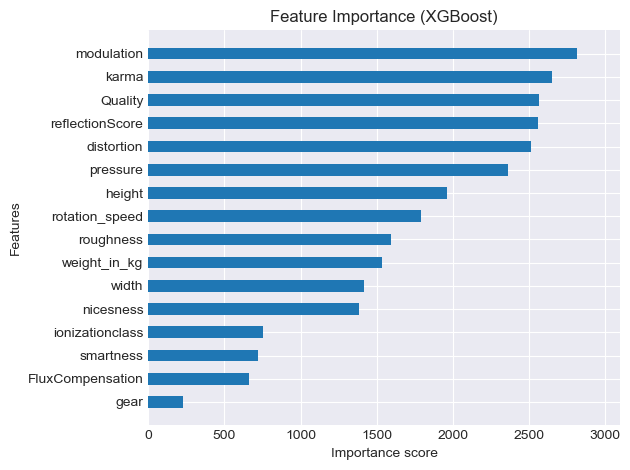

In [73]:
import matplotlib.pyplot as plt
import xgboost as xgb

# If your feature names are stored in a list called "features"
xgb.plot_importance(xgb_clf, height=0.5, show_values=False)
plt.title('Feature Importance (XGBoost)')
plt.tight_layout()
plt.show()


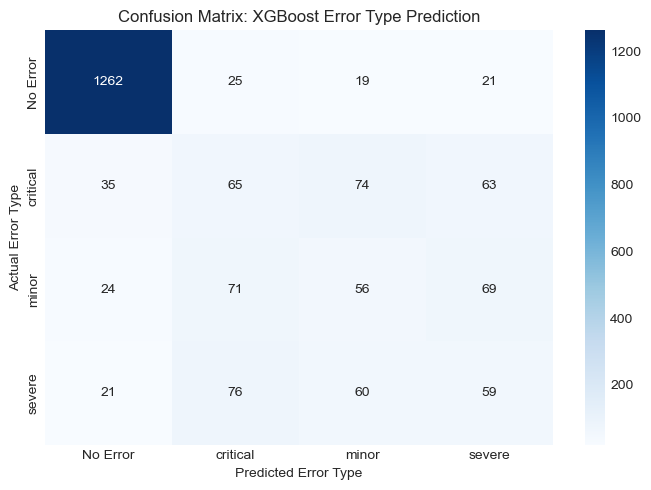

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have le_target.classes_, y_test, y_pred
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=le_target.classes_, 
    yticklabels=le_target.classes_
)
plt.xlabel('Predicted Error Type')
plt.ylabel('Actual Error Type')
plt.title('Confusion Matrix: XGBoost Error Type Prediction')
plt.tight_layout()
plt.show()


#### XG Boost with Smote (DO not use) ####

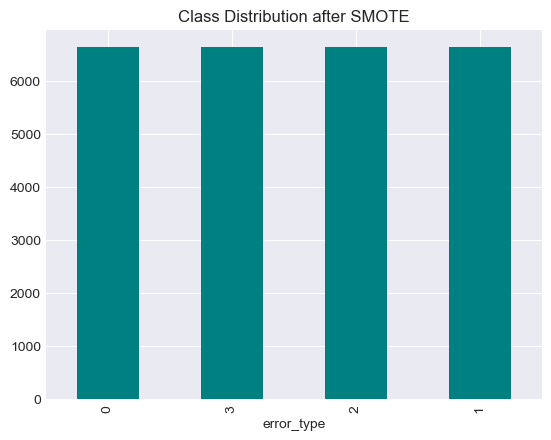

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:25:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1745056743506/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.76

Classification Report:
               precision    recall  f1-score   support

    No Error       0.85      0.93      0.89      1327
    critical       0.73      0.70      0.72      1327
       minor       0.72      0.69      0.71      1327
      severe       0.73      0.72      0.72      1327

    accuracy                           0.76      5308
   macro avg       0.76      0.76      0.76      5308
weighted avg       0.76      0.76      0.76      5308



In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# 1. Prepare features and target
X = df_model[features]
y = df_model[target]

# 2. Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# (Optional) Show new class distribution
import matplotlib.pyplot as plt
import pandas as pd
pd.Series(y_res).value_counts().plot(kind='bar', color='teal')
plt.title('Class Distribution after SMOTE')
plt.show()

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# 4. Train XGBoost Classifier
xgb_clf = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',    # For multiclass classification
    random_state=42
)
xgb_clf.fit(X_train, y_train)

# 5. Predict and evaluate
y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_target.classes_))


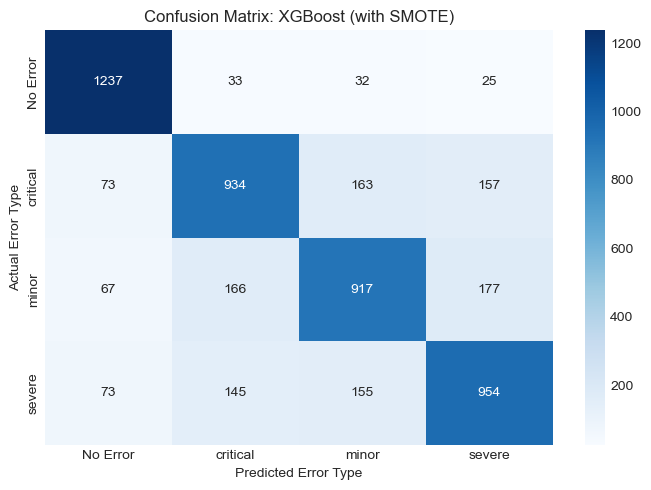

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=le_target.classes_, 
    yticklabels=le_target.classes_
)
plt.xlabel('Predicted Error Type')
plt.ylabel('Actual Error Type')
plt.title('Confusion Matrix: XGBoost (with SMOTE)')
plt.tight_layout()
plt.show()


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=le_target.classes_))


              precision    recall  f1-score   support

    No Error       0.85      0.93      0.89      1327
    critical       0.73      0.70      0.72      1327
       minor       0.72      0.69      0.71      1327
      severe       0.73      0.72      0.72      1327

    accuracy                           0.76      5308
   macro avg       0.76      0.76      0.76      5308
weighted avg       0.76      0.76      0.76      5308



In [32]:
from sklearn.utils.class_weight import compute_sample_weight

# Compute sample weights for balanced learning
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

xgb_clf = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb_clf.fit(X_train, y_train, sample_weight=sample_weights)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:31:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1745056743506/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

#### Smote #### (do not use)